# Aluno: Daniel Ashton Oda
# Matrícula: 190127708

In [5]:
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastai.vision.all import *
from fastdownload import download_url
from time import sleep

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [49]:
urls = search_images('red trafic light fog', max_images=10)
urls[1]

Searching for 'red trafic light fog'


'https://c.stocksy.com/a/Ja8C00/z9/2892939.jpg'

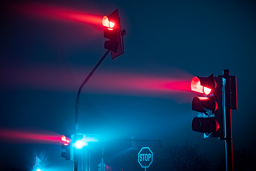

In [56]:
dest = 'test.jpg'
download_url(urls[0], dest, show_progress=False)
im = Image.open(dest)
im.to_thumb(256,256)

In [51]:
searches = 'green traffic light','red traffic light'
path = Path('trafic light')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    download_images(dest, urls=search_images(f'{o} photo night'))
    download_images(dest, urls=search_images(f'{o} photo day'))
    download_images(dest, urls=search_images(f'{o} photo rain'))
    download_images(dest, urls=search_images(f'{o} photo fog'))
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'green traffic light photo'
Searching for 'green traffic light photo night'
Searching for 'green traffic light photo day'
Searching for 'green traffic light photo rain'
Searching for 'green traffic light photo fog'
Searching for 'red traffic light photo'
Searching for 'red traffic light photo night'
Searching for 'red traffic light photo day'
Searching for 'red traffic light photo rain'
Searching for 'red traffic light photo fog'


In [52]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

1

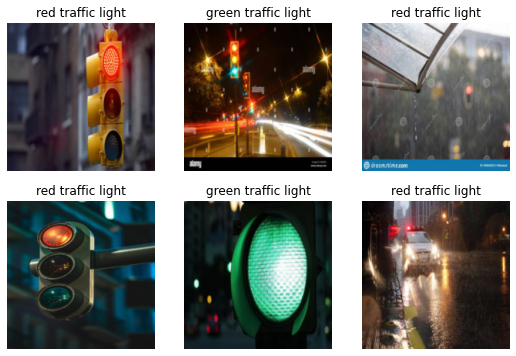

In [53]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [55]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.065805,0.811776,0.293103,00:36


epoch,train_loss,valid_loss,error_rate,time
0,0.639774,0.846620,0.327586,00:48
1,0.573892,0.999296,0.327586,00:48
2,0.472310,1.099310,0.310345,00:48
3,0.413571,1.261834,0.327586,00:49


KeyboardInterrupt: ignored

In [59]:
test,_,probs = learn.predict(PILImage.create('test.jpg'))
print(f"This is a: {test}.")
print(f"Probability it's: {probs[1]:.4f}")

This is a: red traffic light.
Probability it's: 0.9965
